# EDA - Course Project
## Author: Aadarsh Agarwal

### Brief description of the dataset
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions. This data has been taken from Kaggle.

In [1]:
%pylab inline

%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


### Loading the dataset

In [2]:
# The code was removed by Watson Studio for sharing.

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0         John            Brooklyn          Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan              Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan         East Harlem  40.79851  -73.94399   
5        Chris           Manhattan         Murray Hill  40.74767  -73.97500   
6        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7     Shunichi           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8    MaryEllen           Manhattan     Upper West Side  40.80178  -73.96723   
9          Ben           Manhattan           Chinatown  40.71344  -73.99037   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   
6     Private room     60              45                 49  2017-10-05   
7     Private room     79               2                430  2019-06-24   
8     Private room     79               2                118  2017-07-21   
9  Entire home/apt    150               1                160  2019-06-09   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129  
6               0.40                               1                 0  
7               3.47                               1               220  
8               0.99                               1                 0  
9               1.33                               4               188

### Attributes
Lets begin by examining the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Data Cleaning
Before moving on with analyzing the data, we will restrict ourselves to the rows important to the goal of predicting the room price.

In [4]:
df.drop(['latitude','longitude','last_review','neighbourhood'],axis=1,inplace=True)

In [5]:
df.head(10)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group        room_type  price  minimum_nights  \
0         John            Brooklyn     Private room    149               1   
1     Jennifer           Manhattan  Entire home/apt    225               1   
2    Elisabeth           Manhattan     Private room    150               3   
3  LisaRoxanne            Brooklyn  Entire home/apt     89               1   
4        Laura           Manhattan  Entire home/apt     80              10   
5        Chris           Manhattan  Entire home/apt    200               3   
6        Garon            Brooklyn     Private room     60              45   
7     Shunichi           Manhattan     Private room     79               2   
8    MaryEllen           Manhattan     Private room     79               2   
9          Ben           Manhattan  Entire home/apt    150               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0                NaN                               1   
3                270               4.64                               1   
4                  9               0.10                               1   
5                 74               0.59                               1   
6                 49               0.40                               1   
7                430               3.47                               1   
8                118               0.99                               1   
9                160               1.33                               4   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0  
5               129  
6                 0  
7               220  
8                 0  
9               188

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(1), int64(7), object(

From above it can be seen that there are three columns with null values, namely **name**, **host_name** and **reviews_per_month**. Now, for both **name** and **host_name**, there is a respective **id** and **host_id**, and hence no need to worry about those particular as names in particular are not much imporatant while modelling.

Also, from the snippet below, we can see that **reviews_per_month** has null values corresponding to **number_of_reviews** being 0. Hence we can conclude that **reviews_per_month** is also 0 in those places.

In [7]:
df[df['reviews_per_month'].isna()][['number_of_reviews','reviews_per_month']]

number_of_reviews  reviews_per_month
2                      0                NaN
19                     0                NaN
26                     0                NaN
36                     0                NaN
38                     0                NaN
...                  ...                ...
48890                  0                NaN
48891                  0                NaN
48892                  0                NaN
48893                  0                NaN
48894                  0                NaN

[10052 rows x 2 columns]

Therefore, lets fill 0 wherever **reviews_per_month** is null.

In [8]:
df['reviews_per_month'].fillna(0, inplace=True)
df.head(10)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group        room_type  price  minimum_nights  \
0         John            Brooklyn     Private room    149               1   
1     Jennifer           Manhattan  Entire home/apt    225               1   
2    Elisabeth           Manhattan     Private room    150               3   
3  LisaRoxanne            Brooklyn  Entire home/apt     89               1   
4        Laura           Manhattan  Entire home/apt     80              10   
5        Chris           Manhattan  Entire home/apt    200               3   
6        Garon            Brooklyn     Private room     60              45   
7     Shunichi           Manhattan     Private room     79               2   
8    MaryEllen           Manhattan     Private room     79               2   
9          Ben           Manhattan  Entire home/apt    150               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0               0.00                               1   
3                270               4.64                               1   
4                  9               0.10                               1   
5                 74               0.59                               1   
6                 49               0.40                               1   
7                430               3.47                               1   
8                118               0.99                               1   
9                160               1.33                               4   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0  
5               129  
6                 0  
7               220  
8                 0  
9               188

### Handling Outliers

<AxesSubplot:xlabel='price'>

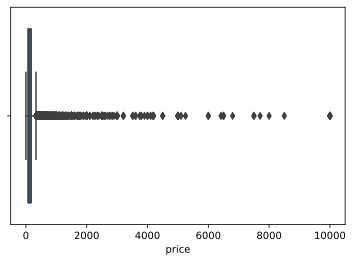

In [9]:
sns.boxplot(x=df['price'])

From the given data and the figure above it is evident that price of some rooms was zero which is not possible. Hence we won't be considering these rows.

In [10]:
df = df.loc[df["price"] != 0]
print(df[df['price']>334]['price'].shape)

(2972,)


Another thing evident is that there are quite a few outliers, so we can remove them before proceeding further. As shown above the ouliers make up a very insignificant portion of the data and hence removing them won't disrupt our dataset

In [11]:
q1=np.percentile(df['price'],25)
q3=np.percentile(df['price'],75)
upr_bound=q3+1.5*(q3-q1)
df=df[df['price']<=334]

Same thing can be done for other features as well

<AxesSubplot:xlabel='minimum_nights'>

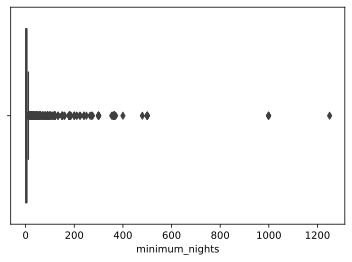

In [12]:
sns.boxplot(x=df['minimum_nights'])

In [13]:
df=df[df['minimum_nights']<600]

<AxesSubplot:xlabel='number_of_reviews'>

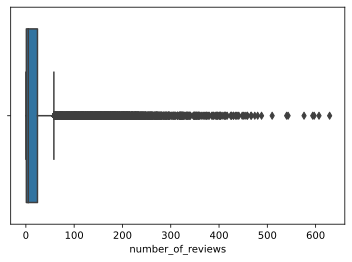

In [14]:
sns.boxplot(x=df['number_of_reviews'])

In [15]:
df=df[df['number_of_reviews']<=500]

<AxesSubplot:xlabel='reviews_per_month'>

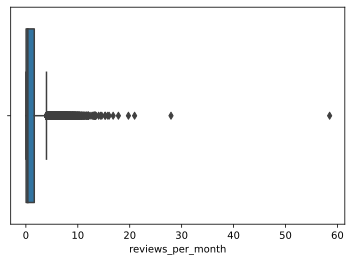

In [16]:
sns.boxplot(x=df['reviews_per_month'])

In [17]:
df=df[df['reviews_per_month']<=20]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45897 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45897 non-null  int64  
 1   name                            45882 non-null  object 
 2   host_id                         45897 non-null  int64  
 3   host_name                       45876 non-null  object 
 4   neighbourhood_group             45897 non-null  object 
 5   room_type                       45897 non-null  object 
 6   price                           45897 non-null  int64  
 7   minimum_nights                  45897 non-null  int64  
 8   number_of_reviews               45897 non-null  int64  
 9   reviews_per_month               45897 non-null  float64
 10  calculated_host_listings_count  45897 non-null  int64  
 11  availability_365                45897 non-null  int64  
dtypes: float64(1), int64(7), object(

### Scaling
At this point if I plot a scatter plot for any two features, it would be somewhat like below which makes scaling all the more neccessary.

In [19]:
df.plot.scatter(x='number_of_reviews',y='price')
plt.show()

In [20]:
from sklearn.preprocessing import RobustScaler

df_1=df.copy()
cols=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
trans = RobustScaler(quantile_range=(20, 80))
da = trans.fit_transform(df_1[cols].values)
df_1[cols]=da
df_1

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group        room_type     price  \
0               John            Brooklyn     Private room  0.418803   
1           Jennifer           Manhattan  Entire home/apt  1.068376   
2          Elisabeth           Manhattan     Private room  0.427350   
3        LisaRoxanne            Brooklyn  Entire home/apt -0.094017   
4              Laura           Manhattan  Entire home/apt -0.170940   
...              ...                 ...              ...       ...   
48890        Sabrina            Brooklyn     Private room -0.256410   
48891        Marisol            Brooklyn     Private room -0.512821   
48892  Ilgar & Aysel           Manhattan  Entire home/apt  0.128205   
48893            Taz           Manhattan      Shared room -0.384615   
48894     Christophe           Manhattan     Private room -0.085470   

       minimum_nights  number_of_reviews  reviews_per_month  \
0                -0.2           0.121212          -0.084577   
1                -0.2           1.212121           0.000000   
2                 0.2          -0.151515          -0.189055   
3                -0.2           8.030303           2.119403   
4                 1.6           0.121212          -0.139303   
...               ...                ...                ...   
48890             0.0          -0.151515          -0.189055   
48891             0.4          -0.151515          -0.189055   
48892             1.6          -0.151515          -0.189055   
48893            -0.2          -0.151515          -0.189055   
48894             1.0          -0.151515          -0.189055   

       calculated_host_listings_count  availability_365  
0                                 2.5          1.225564  
1                                 0.5          1.187970  
2                                 0.0          1.225564  
3                                 0.0          0.582707  
4                                 0.0         -0.146617  
...                               ...               ...  
48890                             0.5         -0.112782  
48891                             0.5         -0.011278  
48892                             0.0         -0.045113  
48893                             2.5         -0.139098  
48894                             0.0         -0.060150  

[45897 rows x 12 columns]

Moving on, we'll use this dataset without features **name** and **host_name** before starting with Feature Engineering.

In [21]:
df_1=df_1.drop(['name','host_name'],axis=1)
df_1.head(10)

id  host_id neighbourhood_group        room_type     price  \
0  2539     2787            Brooklyn     Private room  0.418803   
1  2595     2845           Manhattan  Entire home/apt  1.068376   
2  3647     4632           Manhattan     Private room  0.427350   
3  3831     4869            Brooklyn  Entire home/apt -0.094017   
4  5022     7192           Manhattan  Entire home/apt -0.170940   
5  5099     7322           Manhattan  Entire home/apt  0.854701   
6  5121     7356            Brooklyn     Private room -0.341880   
7  5178     8967           Manhattan     Private room -0.179487   
8  5203     7490           Manhattan     Private room -0.179487   
9  5238     7549           Manhattan  Entire home/apt  0.427350   

   minimum_nights  number_of_reviews  reviews_per_month  \
0            -0.2           0.121212          -0.084577   
1            -0.2           1.212121           0.000000   
2             0.2          -0.151515          -0.189055   
3            -0.2           8.030303           2.119403   
4             1.6           0.121212          -0.139303   
5             0.2           2.090909           0.104478   
6             8.6           1.333333           0.009950   
7             0.0          12.878788           1.537313   
8             0.0           3.424242           0.303483   
9            -0.2           4.696970           0.472637   

   calculated_host_listings_count  availability_365  
0                             2.5          1.225564  
1                             0.5          1.187970  
2                             0.0          1.225564  
3                             0.0          0.582707  
4                             0.0         -0.146617  
5                             0.0          0.338346  
6                             0.0         -0.146617  
7                             0.0          0.680451  
8                             0.0         -0.146617  
9                             1.5          0.560150

### Feature Engineering
Since we are left with only two non-numerical data, we will try to analyze them first.

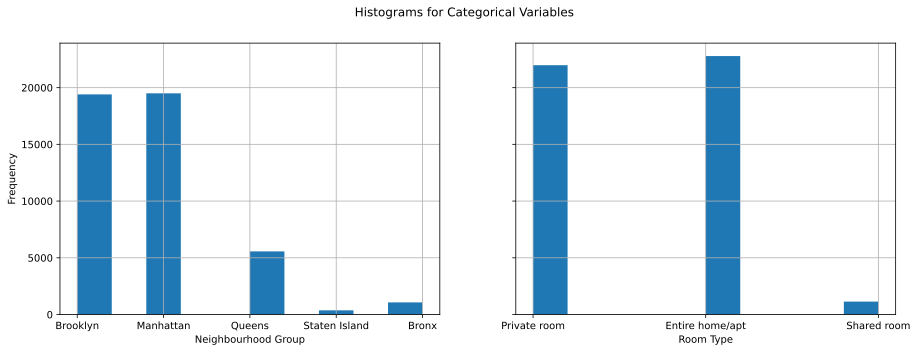

In [22]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
fig.suptitle('Histograms for Categorical Variables')
df_1['neighbourhood_group'].hist(ax=axes[0])
df_1['room_type'].hist(ax=axes[1])
axes[0].set_xlabel("Neighbourhood Group")
axes[0].set_ylabel("Frequency")
axes[1].set_xlabel("Room Type")
fig.show()

As seen from the graph above, there are **5** neighbourhoods. The count of both **Brooklyn** and **Manhattan** is much more than the others. So we can club the rest together and use one-hot encoding for the variable. The same can be done for **Room Type**.

In [23]:
df_1['neighbourhood_group'].replace(['Queens','Staten Island','Bronx'],'Others',True)

In [24]:
df_2 = pd.get_dummies(df_1, columns=['neighbourhood_group','room_type'])
df_2

id   host_id     price  minimum_nights  number_of_reviews  \
0          2539      2787  0.418803            -0.2           0.121212   
1          2595      2845  1.068376            -0.2           1.212121   
2          3647      4632  0.427350             0.2          -0.151515   
3          3831      4869 -0.094017            -0.2           8.030303   
4          5022      7192 -0.170940             1.6           0.121212   
...         ...       ...       ...             ...                ...   
48890  36484665   8232441 -0.256410             0.0          -0.151515   
48891  36485057   6570630 -0.512821             0.4          -0.151515   
48892  36485431  23492952  0.128205             1.6          -0.151515   
48893  36485609  30985759 -0.384615            -0.2          -0.151515   
48894  36487245  68119814 -0.085470             1.0          -0.151515   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0              -0.084577                             2.5          1.225564   
1               0.000000                             0.5          1.187970   
2              -0.189055                             0.0          1.225564   
3               2.119403                             0.0          0.582707   
4              -0.139303                             0.0         -0.146617   
...                  ...                             ...               ...   
48890          -0.189055                             0.5         -0.112782   
48891          -0.189055                             0.5         -0.011278   
48892          -0.189055                             0.0         -0.045113   
48893          -0.189055                             2.5         -0.139098   
48894          -0.189055                             0.0         -0.060150   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                                 1                              0   
1                                 0                              1   
2                                 0                              1   
3                                 1                              0   
4                                 0                              1   
...                             ...                            ...   
48890                             1                              0   
48891                             1                              0   
48892                             0                              1   
48893                             0                              1   
48894                             0                              1   

       neighbourhood_group_Others  room_type_Entire home/apt  \
0                               0                          0   
1                               0                          1   
2                               0                          0   
3                               0                          1   
4                               0                          1   
...                           ...                        ...   
48890                           0                          0   
48891                           0                          0   
48892                           0                          1   
48893                           0                          0   
48894                           0                          0   

       room_type_Private room  room_type_Shared room  
0                           1                      0  
1                           0                      0  
2                           1                      0  
3                           0                      0  
4                           0                      0  
...                       ...                    ...  
48890                       1                      0  
48891                       1                      0  
48892                       0                      0  
48893                      

### Hypothesis
1. Manhattan Listings are most expensive.
2. More the minimum number of nights, more is the price.
3. Private rooms have the most availability.

I'll be working on the first hypothesis only in this case. So let me cleary defne the hypothesis.

**Null Hypothesis**: Manhattan Listings have same prices.

**Alternate Hypothesis**: Manhattan Listings are the most expensive.

The test statistic here is the price of listings.

<AxesSubplot:>

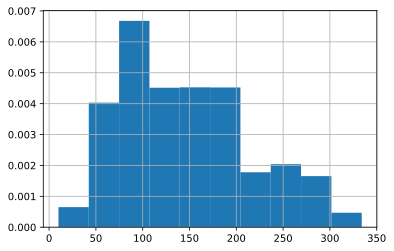

In [25]:
df[df['neighbourhood_group']=='Manhattan']['price'].hist(density=True)

### Hypothesis Testing
#### Performing Z-test

In [26]:
mu=df['price'].mean()
sd=df['price'].std()
smu=df[df['neighbourhood_group']=='Manhattan']['price'].mean()
n=df[df['neighbourhood_group']=='Manhattan']['price'].count()

In [27]:
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df[df['neighbourhood_group']=='Manhattan']['price'], x2=None, value=mu)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


Since our sample size is so large, the probability we get in the above case for our null case is 0. Thus we reject the null hypotheis and accept the alternate hypothesis that **Manhattan Listings are the most expensive.**

### Suggestions and Quality of Data
The dataset is of average quality in my regards. There is no strong correlattion between any attributes inspite of extensive cleaning. Despite being a large dataset, the values are repetitive and hence are not of much use. Additional attributes such as area, services offered or any physical characteristics of listings might better help making any kind of predictions from the data.